__ABSTRACT__

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account
for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are 
diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is 
approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, 
Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be 
implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is 
Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images 
are examined by the radiologist. A manual examination can be error-prone due to the level of complexities 
involved in brain tumors and their properties.
Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI) 
has consistently shown higher accuracy than manual classification. Hence, proposing a system performing 
detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), 
Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

__DESCRIPTION__

To Detect and Classify Brain Tumor using, CNN and TL; as an asset of Deep Learning and to examine the tumor 
position(segmentation).

__Link to the Image Dataset__

https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

__IMPORT LIBRARIES__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__IMPORT TENSORFLOW/KERAS FOR TRAINING THE MODEL__

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory

__MOUNT THE GOOGLE DRIVE__

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


_unzip the folder_

In [4]:
!unzip /content/drive/MyDrive/TUMOR.zip

Archive:  /content/drive/MyDrive/TUMOR.zip
   creating: TUMOR/Testing/
   creating: TUMOR/Testing/glioma_tumor/
  inflating: TUMOR/Testing/glioma_tumor/image(1).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(10).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(100).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(11).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(12).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(13).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(14).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(15).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(16).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(17).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(18).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(19).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(2).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(20).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(21).jpg  
  inflating: TUMOR/Testing/glioma_tumor/image(22)

___create training and testing paths___

In [5]:
train_path  = '/content/TUMOR/Training'
test_path  = '/content/TUMOR/Testing'

___Load Images___

In [6]:
image_size = (224,224)
batch_size = 64

train_batch = image_dataset_from_directory(
    directory = train_path,
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = image_size,
    class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    shuffle = False
)
test_batch = image_dataset_from_directory(
    directory = test_path,
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = image_size,
    class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    shuffle = False
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


The training batch was not shuffled because the plotting of the images will be shuffled, not just the images, but their labels as well, we wouldn't want that because we want each image to be labelled accurately.

__GET LABELS AND IMAGES TO BE SHOWN__

In [7]:
train_images = []
for x, y in train_batch.unbatch():
    train_images.append(x)
images = np.array(train_images)

In [8]:
labels = []
for x, y in train_batch:
    labels.append(y)
labels = np.concatenate(labels, axis = 0)
labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [9]:
string_labels = []
for labl in labels:
    if labl == 0:
        a = 'glioma tumor'
        string_labels.append(a)
    elif labl == 1:
        a = 'meningioma tumor'
        string_labels.append(a)
    elif labl == 2:
        a = 'no tumor'
        string_labels.append(a)
    else:
        a = 'pituitary tumor'
        string_labels.append(a)
    

CALCULATE THE PERCENTAGE OF IMAGES CLASSES PRESENT IN THE IMAGE SET

In [10]:
for i in range(4):
    if i == 0:
        a = 'glioma tumor'
        print (f"glioma tumor has {np.round(100 * np.mean(labels == 0), 1)}% of pictures in the training image set.")
    elif i == 1:
        a = 'meningioma tumor'
        print (f"meningioma tumor has {np.round(100 * np.mean(labels == 1), 1)}% of pictures in the training image set.")
    elif i == 2:
        a = 'no tumor'
        print (f"no tumor has {np.round(100 * np.mean(labels == 2), 1)}% of pictures in the training image set.")
    else:
        a = 'pituitary tumor'
        print (f"pituitary tumor has {np.round(100 * np.mean(labels == 3), 1)}% of pictures in the training image set.")


glioma tumor has 28.8% of pictures in the training image set.
meningioma tumor has 28.6% of pictures in the training image set.
no tumor has 13.8% of pictures in the training image set.
pituitary tumor has 28.8% of pictures in the training image set.


from the above, the image set is a little bit divided evenly, so training will be possible and safe on this batch

__PLOTTING THE TRAIN SET IMAGES__

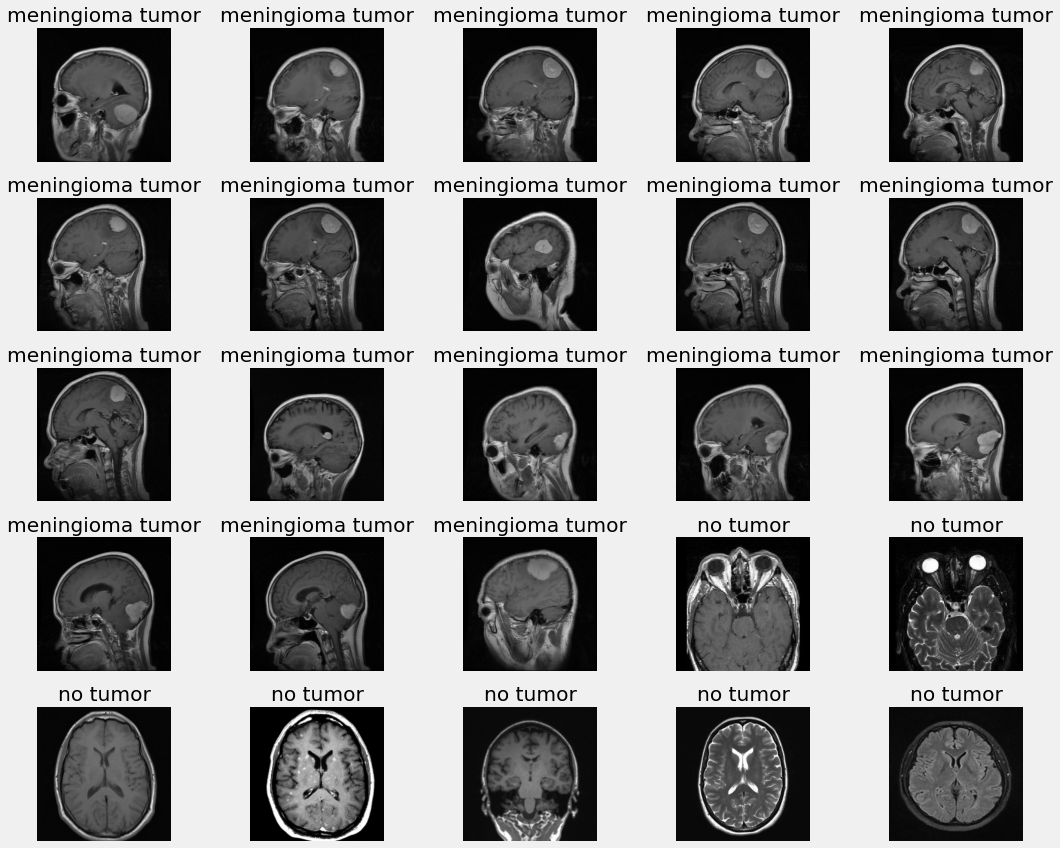

In [11]:
plt.style.use('fivethirtyeight')
def plotImages(data_batch):
    images = []
    for x, y in data_batch.unbatch():
        images.append(x)
    images = np.array(images)
    images = images / 255.0
    labels = []
    for x, y in data_batch:
        labels.append(y)
    labels = np.concatenate(labels, axis = 0)
    string_labels = []
    for labl in labels:
        if labl == 0:
            a = 'glioma tumor'
            string_labels.append(a)
        elif labl == 1:
            a = 'meningioma tumor'
            string_labels.append(a)
        elif labl == 2:
            a = 'no tumor'
            string_labels.append(a)
        else:
            a = 'pituitary tumor'
            string_labels.append(a)
    labels = string_labels
    fig, ax = plt.subplots(5, 5, figsize = (15, 12))
    ax = ax.flatten()
    for img, lbl, axi in zip(images[1630:1655], labels[1630:1655], ax):
        axi.imshow(img)
        axi.axis('off')
        axi.set_title(lbl)
    plt.tight_layout()
    plt.show()
    # plt.title(labels)

plotImages(train_batch)

The function above is to plot images in any set(Train or Test), we can easily call the function and pass in the __test_batch__ to plot the images, but, notice how the images plotted were indexed from [1630:1655], checking the length of the __test_batch__, which occurs to be just 394, the images do not stretch to that length, so no image may be displayed.

When we want to display images in the Testing set we might have to write a new function to display them.
This is not neccessary, But in this case, the Train set was indexed to show two different classes to avoid confusion.

__BUILDING THE NEURAL NETWORK__

In [12]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = (224, 224, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (1,1)))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (1,1)))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (1,1)))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
# model.add(Dense(units=512 ,activation='relu'))
model.add(Dense(units=4 ,activation='softmax'))

call = EarlyStopping(monitor = 'accuracy', patience=25, verbose = 1, mode = 'max')
model.compile(optimizer = 
    tf.keras.optimizers.Adam(
    learning_rate=0.001,
    name="Adam"), metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [13]:
model.fit(
    x = train_batch,
    epochs = 100,
    verbose = 1,
    callbacks = [call]
)

Epoch 1/100
45/45 [==============================] - 44s 596ms/step - loss: 7116.3071 - accuracy: 0.6073
Epoch 2/100
45/45 [==============================] - 22s 487ms/step - loss: 683.2103 - accuracy: 0.7760
Epoch 3/100
45/45 [==============================] - 23s 500ms/step - loss: 882.3899 - accuracy: 0.7885
Epoch 4/100
45/45 [==============================] - 22s 484ms/step - loss: 355.3708 - accuracy: 0.5411
Epoch 5/100
45/45 [==============================] - 22s 476ms/step - loss: 6.5968 - accuracy: 0.4111
Epoch 6/100
45/45 [==============================] - 22s 479ms/step - loss: 1.9074 - accuracy: 0.2383
Epoch 7/100
45/45 [==============================] - 22s 483ms/step - loss: 1.3874 - accuracy: 0.3098
Epoch 8/100
45/45 [==============================] - 22s 480ms/step - loss: 1.3670 - accuracy: 0.3463
Epoch 9/100
45/45 [==============================] - 22s 477ms/step - loss: 1.3162 - accuracy: 0.3937
Epoch 10/100
45/45 [==============================] - 22s 478ms/step - lo

In [14]:
test_labels = []
for x, y in test_batch:
    test_labels.append(y)
test_labels = np.concatenate(test_labels, axis = 0)
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

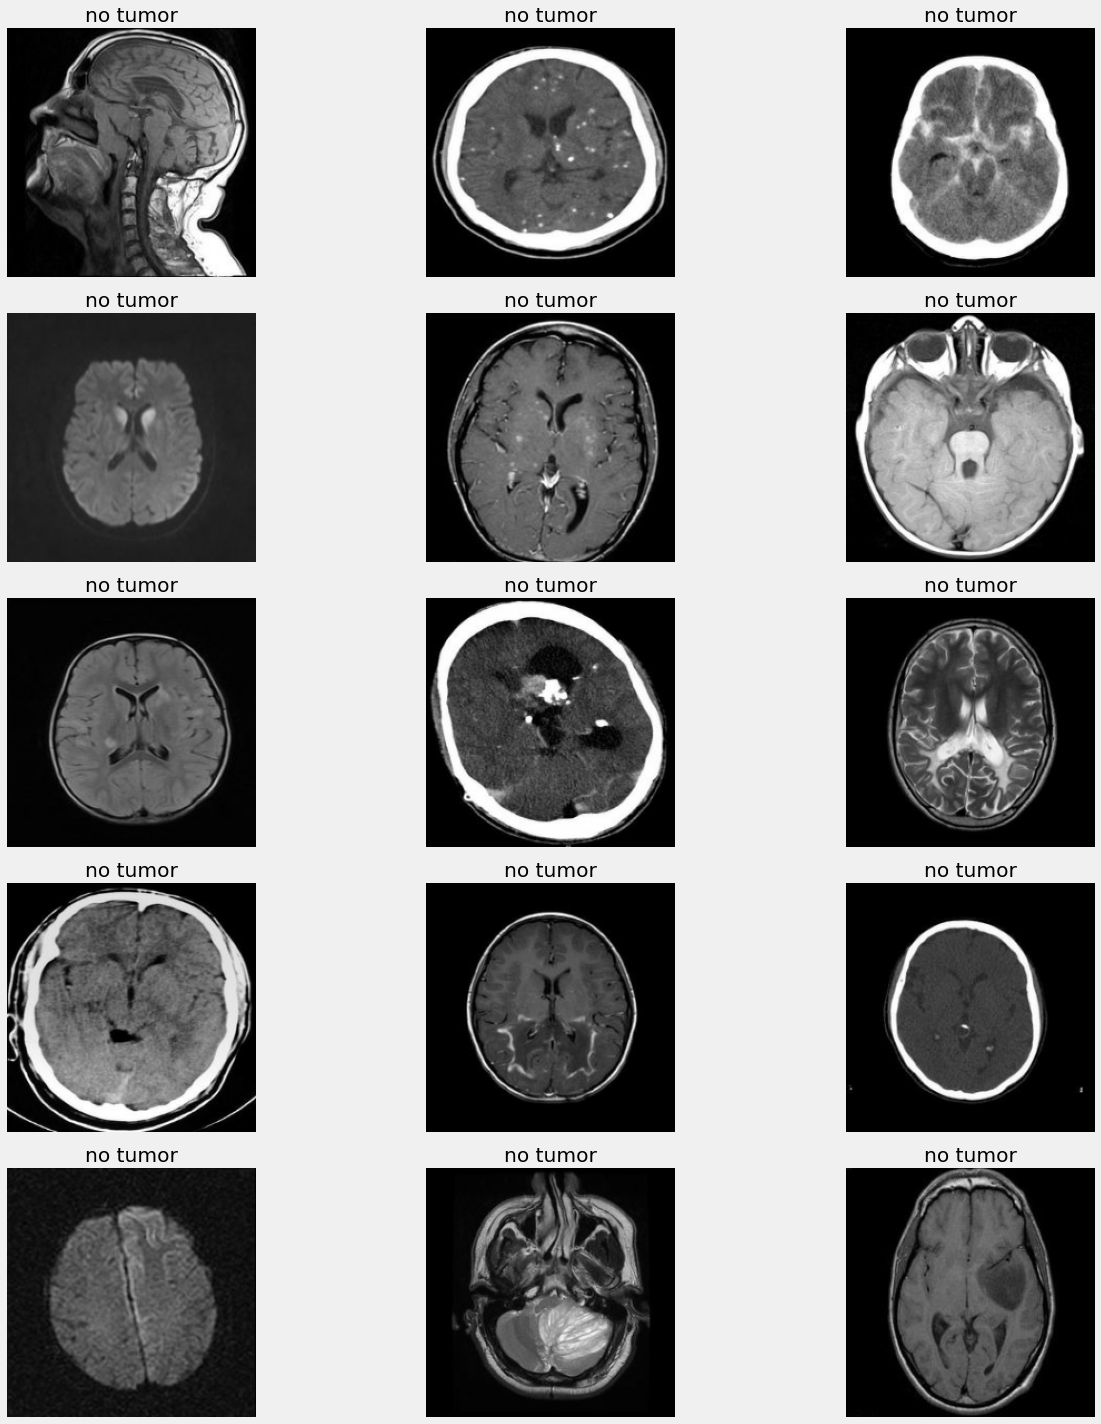

In [15]:
images = []
for x, y in test_batch.unbatch():
    images.append(x)
images = np.array(images)
images = images / 255
test_labels = []
for x, y in test_batch:
    test_labels.append(y)
test_labels = np.concatenate(test_labels, axis = 0)
test_string_labels = []
for labl in test_labels:
    if labl == 0:
        a = 'glioma tumor'
        test_string_labels.append(a)
    elif labl == 1:
        a = 'meningioma tumor'
        test_string_labels.append(a)
    elif labl == 2:
        a = 'no tumor'
        test_string_labels.append(a)
    else:
        a = 'pituitary tumor'
        test_string_labels.append(a)
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20))
ax = ax.flatten()
for img, lbl, axi in zip(images[300:316], test_string_labels[300:316], ax):
    axi.imshow(img)
    axi.axis('off')
    axi.set_title(lbl)
plt.tight_layout()

In [16]:
predictions = (model.predict(test_batch) > 0.5).astype("int32")
predictions = np.argmax(predictions, axis = 1)

In [17]:
str_preds = []
for i in predictions:
    if i == 0:
        a = 'glioma tumor'
        str_preds.append(a)
    elif i == 1:
        a = 'meningioma tumor'
        str_preds.append(a)
    elif i == 2:
        a = 'no tumor'
        str_preds.append(a)
    else:
        a = 'pituitary tumor'
        str_preds.append(a)

In [18]:
print (predictions)

[1 2 0 2 2 2 2 1 2 3 3 0 1 2 2 2 1 2 2 0 2 1 1 2 0 0 1 2 2 1 2 2 2 3 1 2 2
 2 3 1 2 0 0 1 2 1 0 2 1 2 0 0 2 1 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 3 2 1 2 3 1 2 1 0 3 2 2 1 2 1 2 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 1 2 2 2 3 3 3 3 3 3 3 1 1 3 3 3 1 1 3 3 3 1 1 1 1 0 0 3 3
 3 3 3 3 3 1 3 1 1 3 3 3 3 1 1 1 3 3 1 1 3 3 1 3]


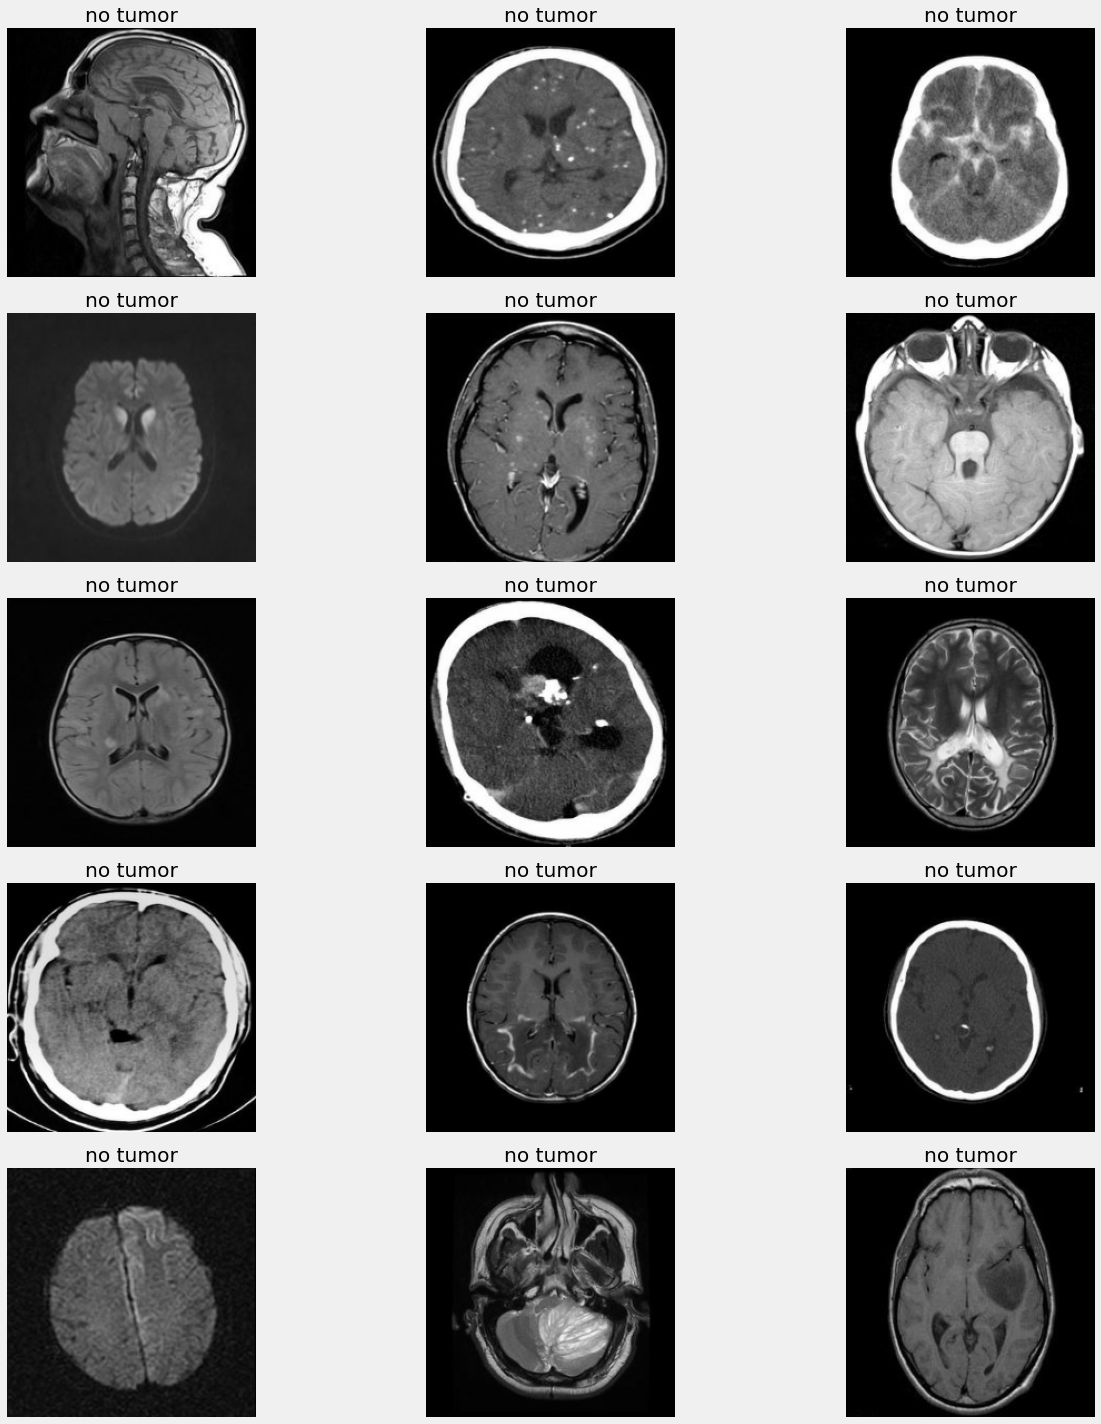

In [19]:
images = []
for x, y in test_batch.unbatch():
    images.append(x)
images = np.array(images)
images = images / 255
labels = str_preds
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20))
ax = ax.flatten()
for img, lbl, axi in zip(images[300:316], labels[300:316], ax):
    axi.imshow(img)
    axi.axis('off')
    axi.set_title(lbl)
plt.tight_layout()

In [20]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [21]:
print (classification_report(y_true=test_labels, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.94      0.30      0.45       100
           1       0.71      0.98      0.82       115
           2       0.72      1.00      0.84       105
           3       0.88      0.69      0.77        74

    accuracy                           0.76       394
   macro avg       0.81      0.74      0.72       394
weighted avg       0.80      0.76      0.73       394



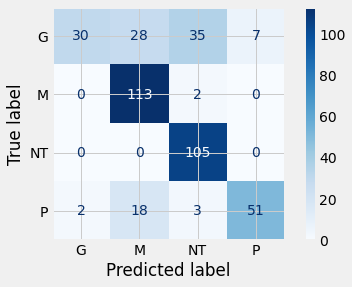

In [22]:
ConfusionMatrixDisplay.from_predictions(y_true=test_labels, y_pred=predictions, display_labels = ['G', 'M', 'NT', 'P'], cmap = plt.cm.Blues)

__PREDICTING ON NEW DATA__

In [48]:
!unzip /content/drive/MyDrive/Confirm_imageset2.zip

Archive:  /content/drive/MyDrive/Confirm_imageset2.zip
   creating: Confirm_imageset2/a/
   creating: Confirm_imageset2/b/
  inflating: Confirm_imageset2/b/image(127).jpg  
   creating: Confirm_imageset2/c/
  inflating: Confirm_imageset2/c/image(1).jpg  
  inflating: Confirm_imageset2/c/image(2).jpg  
  inflating: Confirm_imageset2/c/image(3).jpg  
  inflating: Confirm_imageset2/c/image(4).jpg  
  inflating: Confirm_imageset2/c/image(5).jpg  
  inflating: Confirm_imageset2/c/image(6).jpg  
   creating: Confirm_imageset2/d/
  inflating: Confirm_imageset2/d/image(68).jpg  


In [49]:
new_path = '/content/Confirm_imageset2'

In [63]:
new_data = image_dataset_from_directory(
    directory = new_path,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = False,
    color_mode = 'rgb',
    class_names = ['a', 'b', 'c', 'd']
)

Found 8 files belonging to 4 classes.


In [64]:
new_test_label = []
for x,y in new_data:
  new_test_label.append(y)
new_test_label = np.concatenate(new_test_label, axis = 0)
new_test_label


array([1, 2, 2, 2, 2, 2, 2, 3], dtype=int32)

In [65]:
str_new_test_label = []
for i in new_test_label:
  if i == 0:
    a = 'glioma tumor'
    str_new_test_label.append(a)
  elif i == 1:
    a = 'meningioma tumor'
    str_new_test_label.append(a)
  elif i == 2:
    a = 'no tumor'
    str_new_test_label.append(a)
  else:
    str_new_test_label.append('pituitary tumor')
str_new_test_label

['meningioma tumor',
 'no tumor',
 'no tumor',
 'no tumor',
 'no tumor',
 'no tumor',
 'no tumor',
 'pituitary tumor']

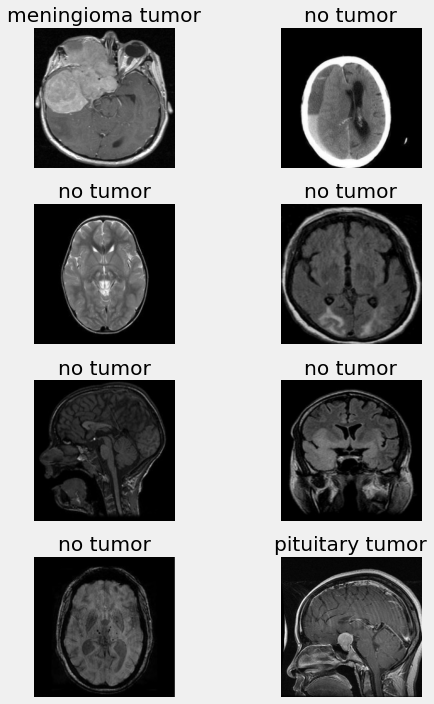

In [66]:
images = []
for x, y in new_data.unbatch():
  images.append(x)
images = np.array(images)
images = images / 255
labels = str_new_test_label
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (8,10))
ax = ax.flatten()

for img, lbl, axi in zip(images, labels, ax):
  axi.imshow(img)
  axi.set_title(lbl)
  axi.axis('off')
plt.tight_layout()

__PREDICTING__

This new set of Data that is to be predicted has 6 imagesof which the first is 'meningioma tumor' as seen above, the next 4, 'no tumor' and the last pituitary tumor.

Predictions will be made on them and also show the predictions

In [67]:
new_preds = (model.predict(new_data) > 0.5).astype("int32")
new_preds = np.argmax(new_preds, axis = 1)
new_preds

array([1, 2, 2, 2, 2, 2, 2, 0])

In [68]:
pred_str_new_test_label = []
for i in new_preds:
  if i == 0:
    a = 'glioma tumor'
    pred_str_new_test_label.append(a)
  elif i == 1:
    a = 'meningioma tumor'
    pred_str_new_test_label.append(a)
  elif i == 2:
    a = 'no tumor'
    pred_str_new_test_label.append(a)
  else:
    pred_str_new_test_label.append('pituitary tumor')
pred_str_new_test_label

['meningioma tumor',
 'no tumor',
 'no tumor',
 'no tumor',
 'no tumor',
 'no tumor',
 'no tumor',
 'glioma tumor']

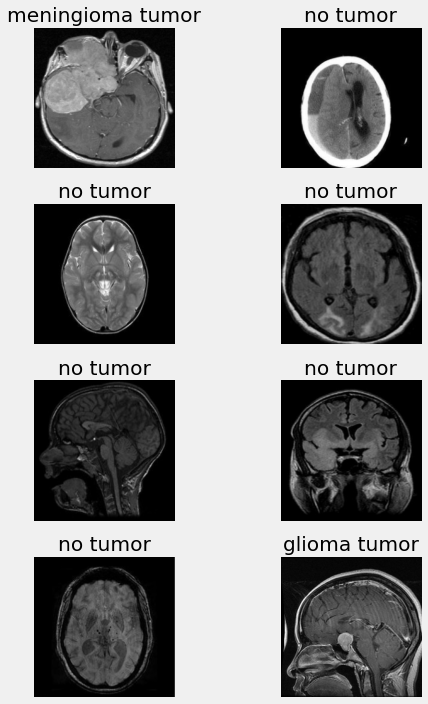

In [69]:
images = []
for x, y in new_data.unbatch():
  images.append(x)
images = np.array(images)
images = images / 255
labels = pred_str_new_test_label
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (8,10))
ax = ax.flatten()

for img, lbl, axi in zip(images, labels, ax):
  axi.imshow(img)
  axi.set_title(lbl)
  axi.axis('off')
plt.tight_layout()